# World Happiness Report


### Data description

The data is about the World Happiness Report.  The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness. The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale.  The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. 

### The Six Factors

Economic production<br>
Social support<br>
Life expectancy<br>
Freedom<br>
Absence of corruption<br>
Generosity

The values for these features are to be understood as ratings for each of the factors. Here, these factors are used to estimate the happiness sscore in the countries.

### Conventions

* Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors.<br>
- It is defined to have the minimum value for each of the characteristics, which by convention is 0.<br>
- Each characteristic represents how much more value that characteristic contributes to the happiness score of 0-10 of a nation than it does for Dystopia.<br>
- Happiness score of a nation is found by adding the Dystopia happiness score of that year with the six factors of the nation in that year.

### Importing Required Libraries

In [81]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [4]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\happiness_score_dataset.csv")

In [5]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


The above shown are the first 5 rows of the dataset

In [7]:
df.shape

(158, 12)

The dataset has 158 rows and 12 columns

In [22]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [12]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no null values in the dataset

In [14]:
for i in range(len(df['Region'].unique())-1):
    print(str(df['Region'].unique()[i])+" : "+ str(len(df[df['Region']==df['Region'].unique()[i]])))

Western Europe : 21
North America : 2
Australia and New Zealand : 2
Middle East and Northern Africa : 20
Latin America and Caribbean : 22
Southeastern Asia : 9
Central and Eastern Europe : 29
Eastern Asia : 6
Sub-Saharan Africa : 40


This shows the number of unique values in the regions

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

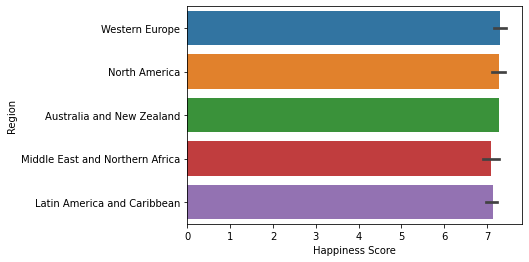

In [15]:
sns.barplot(y= df['Region'][:20], x= df['Happiness Score'])

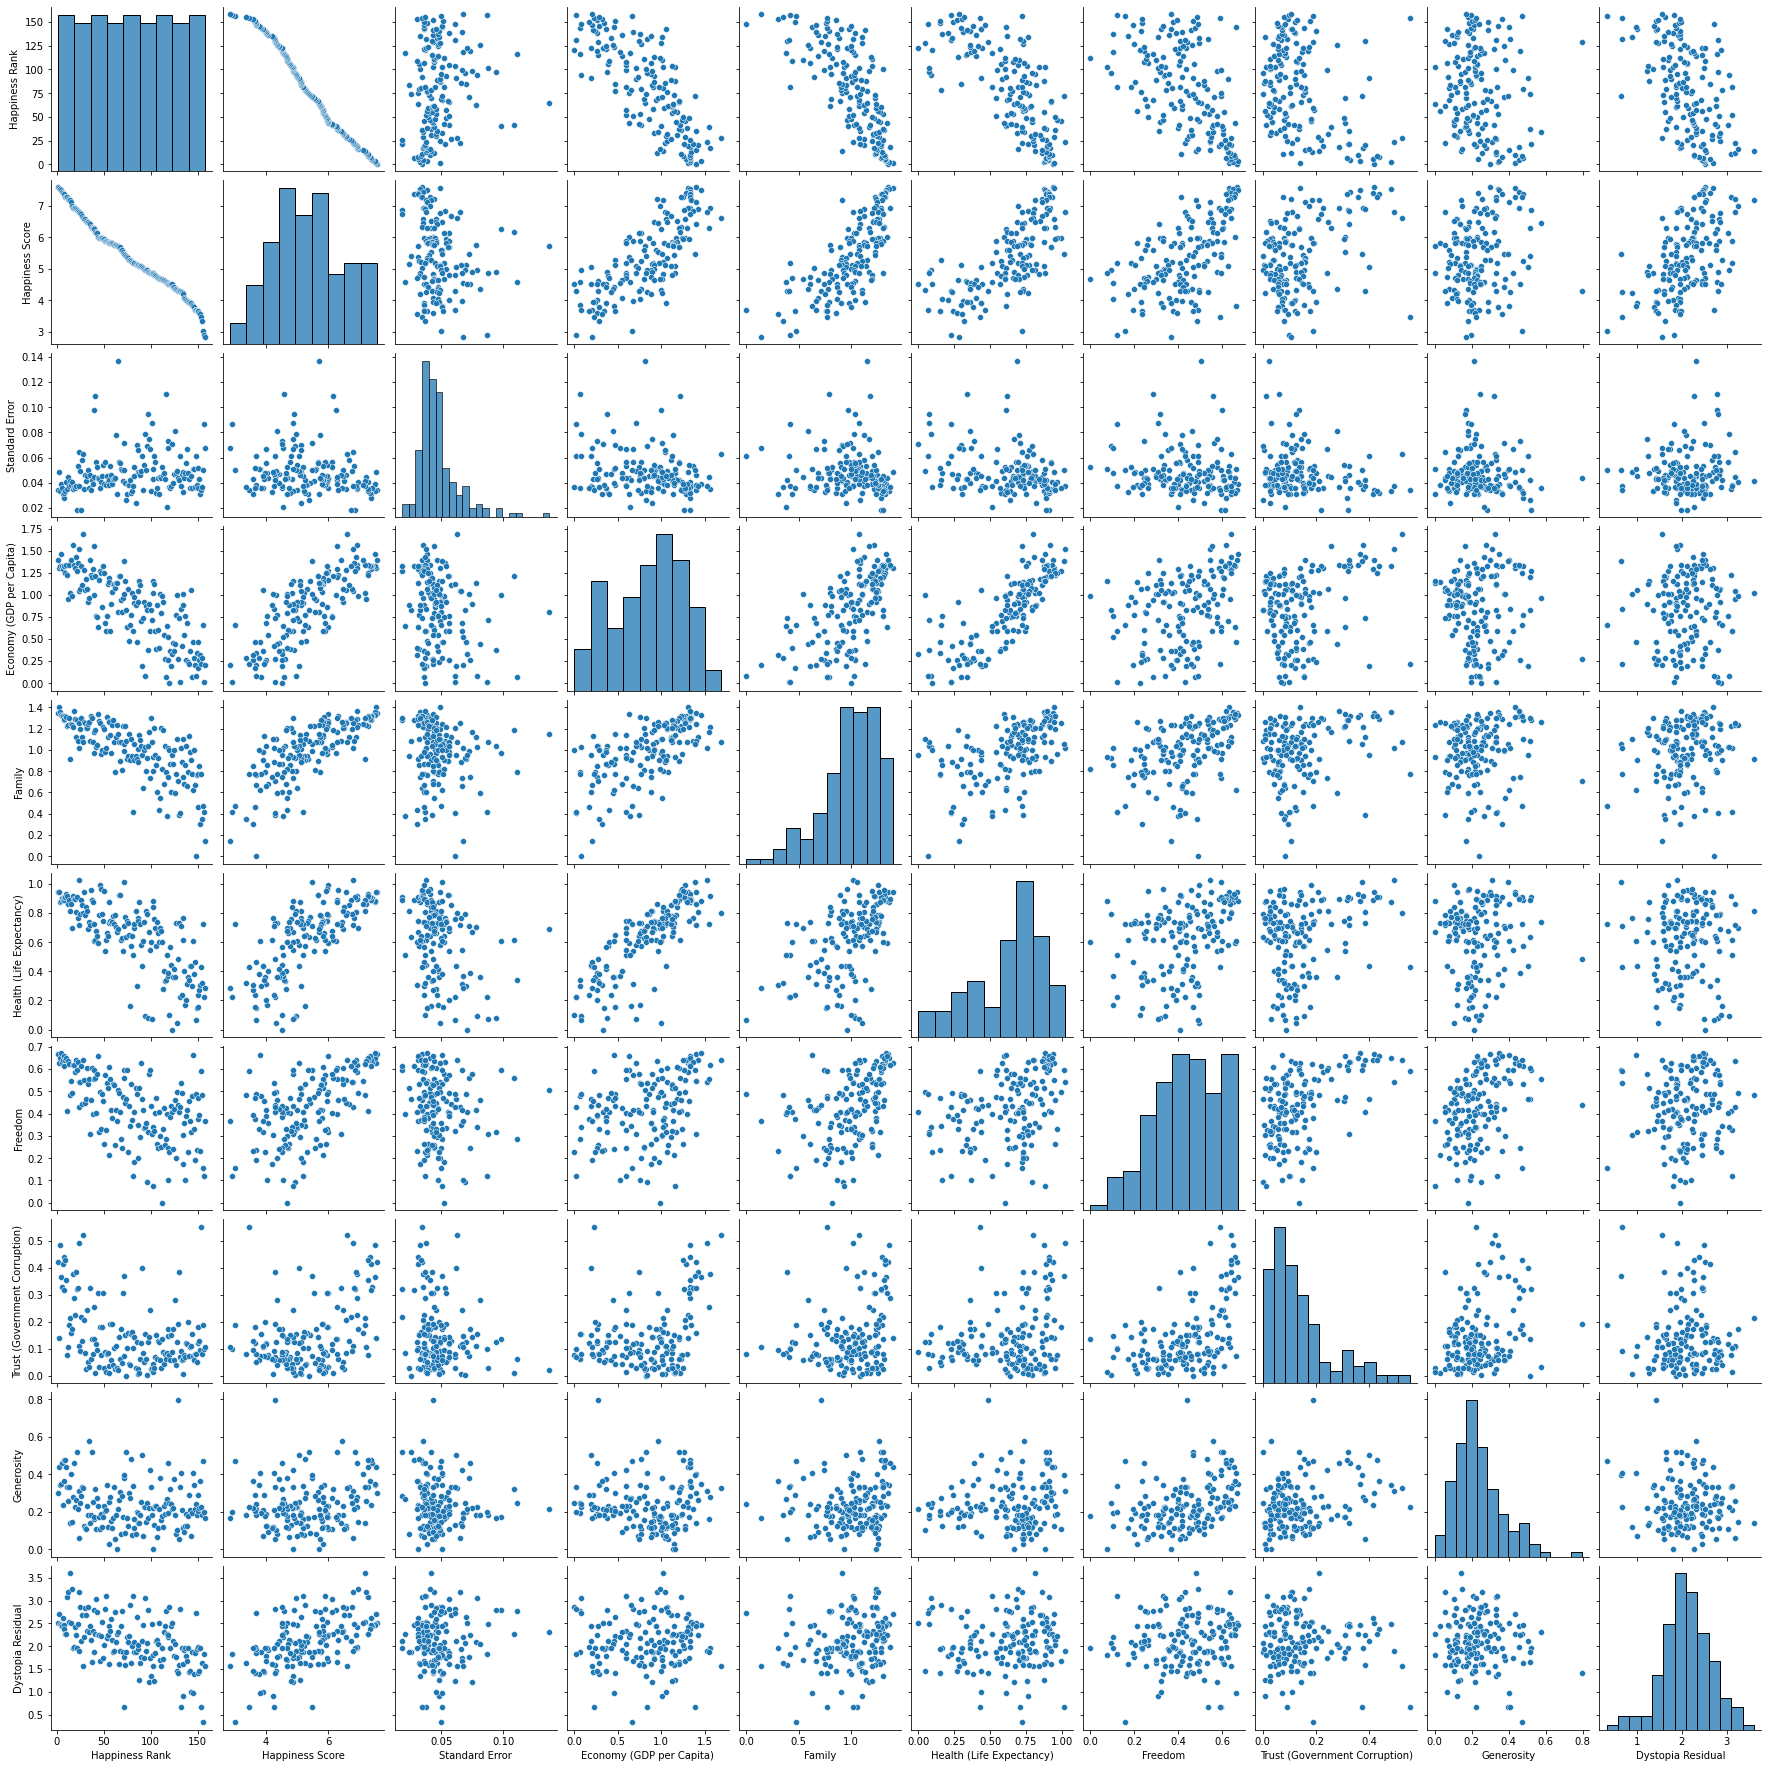

In [16]:
sns.pairplot(df)

### Analysing top 15 countries for each attribute

In [50]:
s_eco=df.nlargest(15,'Economy (GDP per Capita)')
s_fam=df.nlargest(15,'Family')
s_le=df.nlargest(15,'Health (Life Expectancy)')
s_fre=df.nlargest(15,'Freedom')
s_tru=df.nlargest(15,'Trust (Government Corruption)')
s_gen=df.nlargest(15,'Generosity')


<AxesSubplot:xlabel='Generosity', ylabel='Country'>

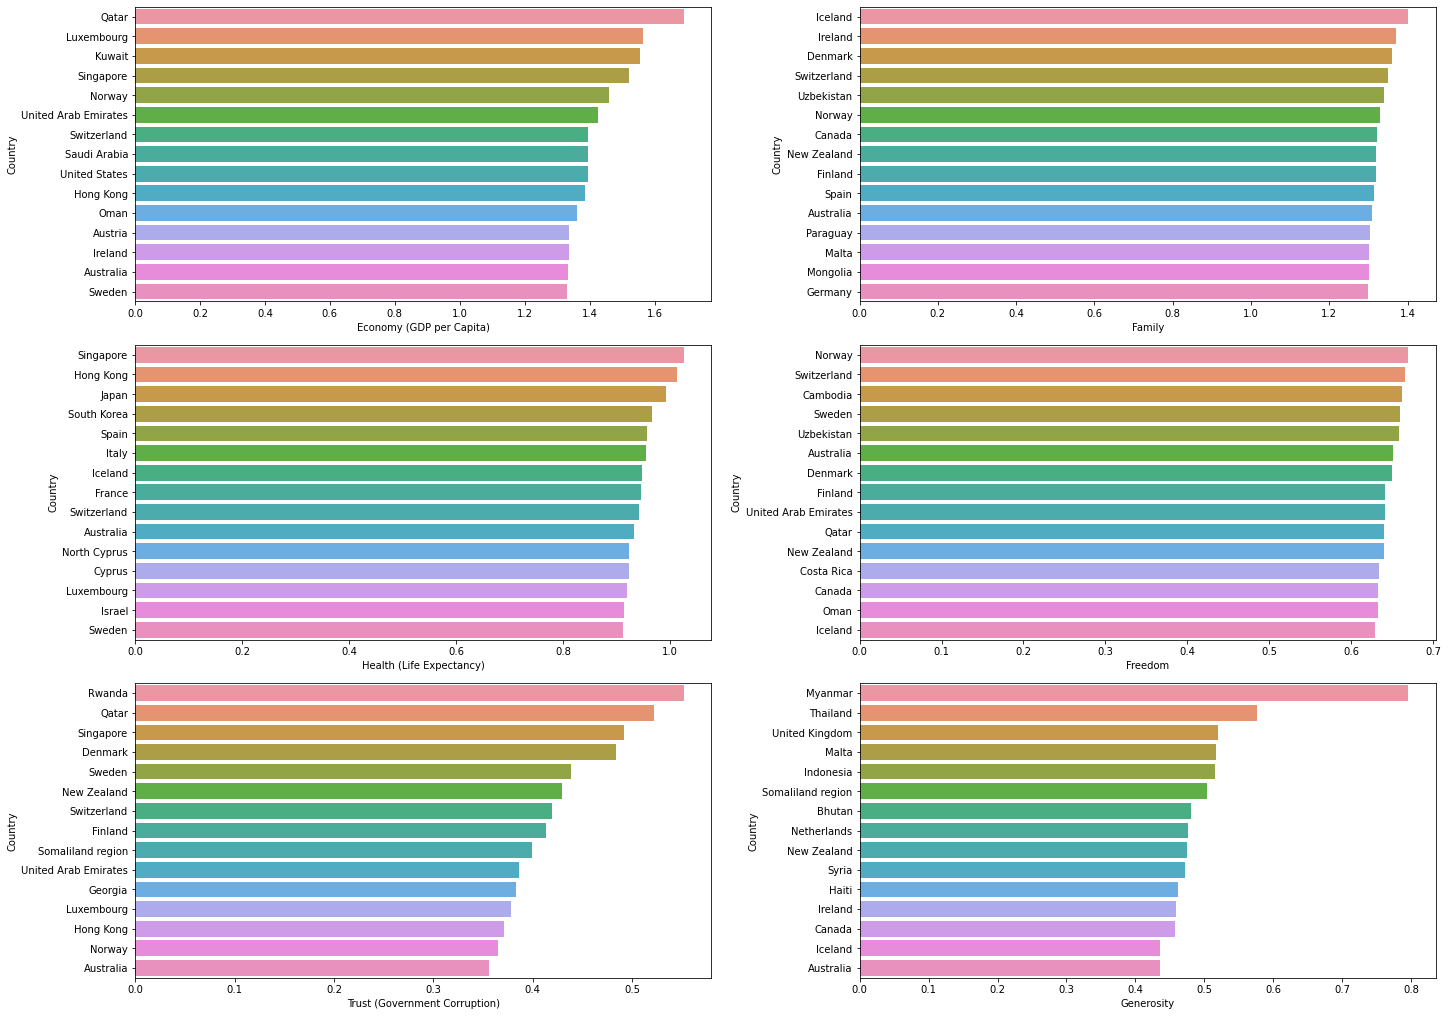

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(20,14))
sns.barplot(y= s_eco['Country'], x= s_eco['Economy (GDP per Capita)'],ax=axes[0,0])
sns.barplot(y= s_fam['Country'], x= s_fam['Family'],ax=axes[0,1])
sns.barplot(y= s_le['Country'], x= s_le['Health (Life Expectancy)'],ax=axes[1,0])
sns.barplot(y= s_fre['Country'], x= s_fre['Freedom'],ax=axes[1,1])
sns.barplot(y= s_tru['Country'], x= s_tru['Trust (Government Corruption)'],ax=axes[2,0])
sns.barplot(y= s_gen['Country'], x= s_gen['Generosity'],ax=axes[2,1])


In [56]:
corr_mat=df.corr()

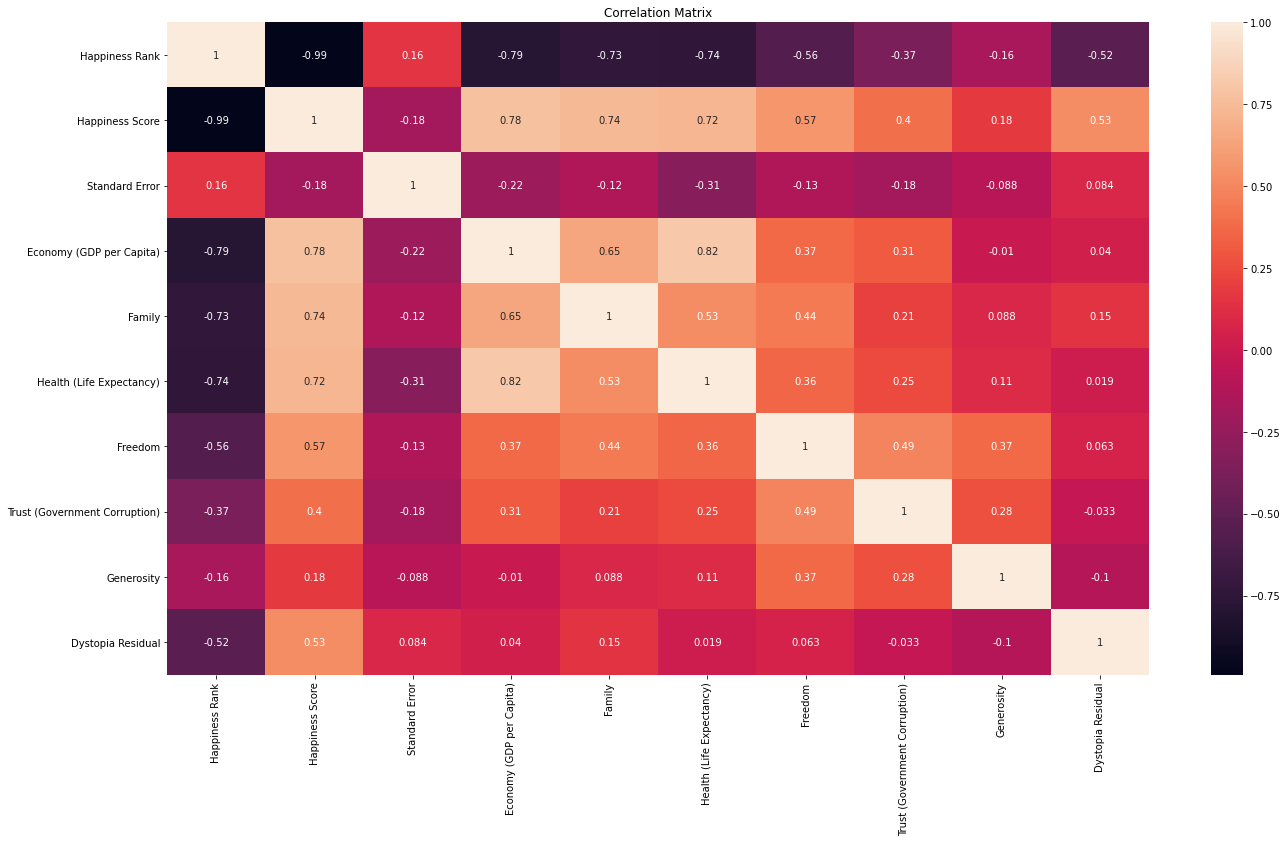

In [57]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat, annot=True)
plt.title("Correlation Matrix")
plt.show()

Here, we can see that the Happiness score is highly correlated with Economy

<AxesSubplot:xlabel='Happiness Score', ylabel='Family'>

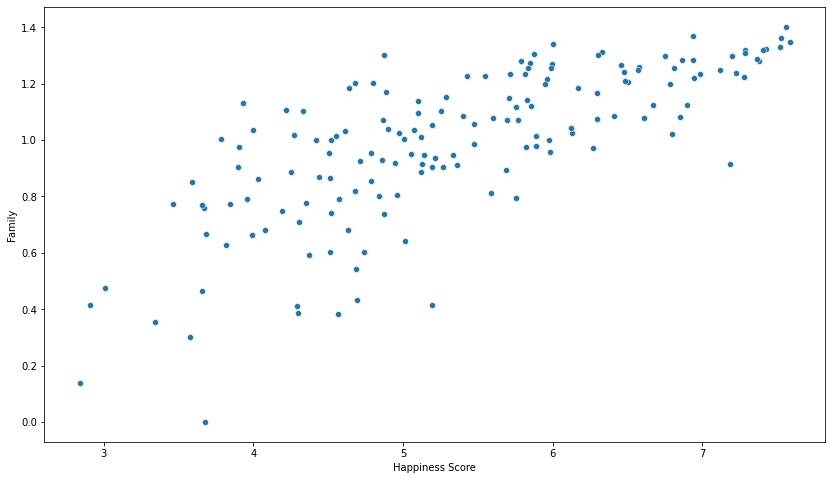

In [70]:
fig = plt.figure(figsize=(14,8))
sns.scatterplot(x= df['Happiness Score'],y=df['Family'])


<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

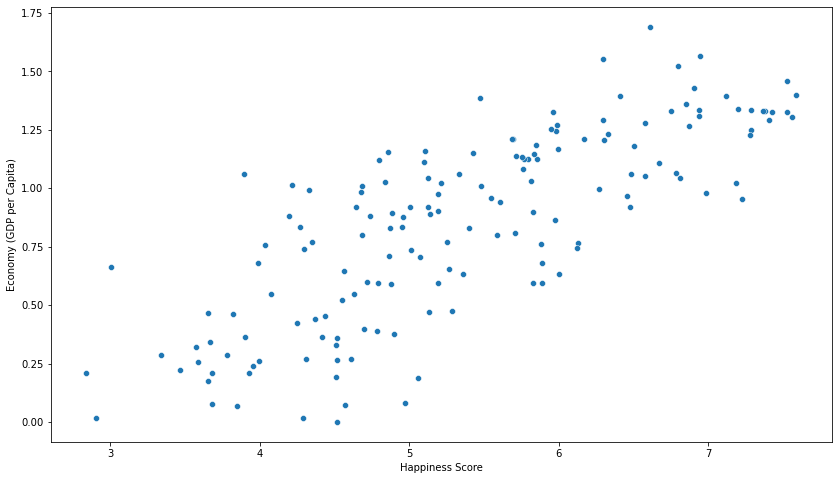

In [76]:
fig = plt.figure(figsize=(14,8))
sns.scatterplot(x= df['Happiness Score'],y=df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Health (Life Expectancy)'>

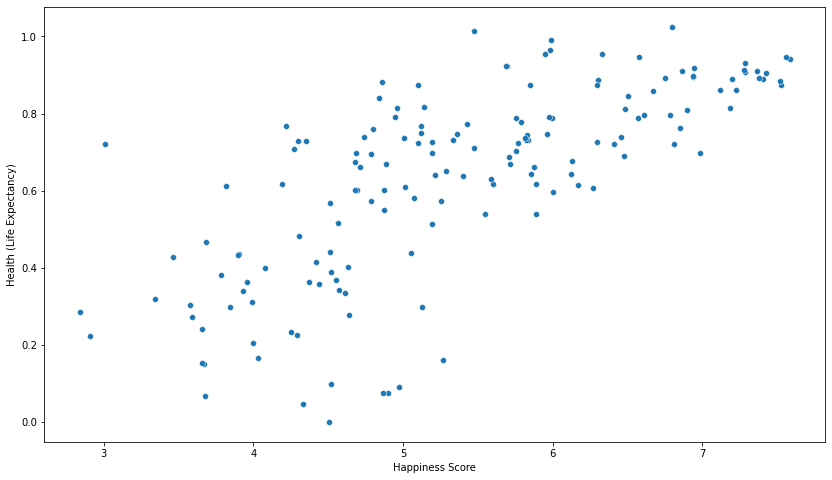

In [75]:
fig = plt.figure(figsize=(14,8))
sns.scatterplot(x= df['Happiness Score'],y=df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Freedom'>

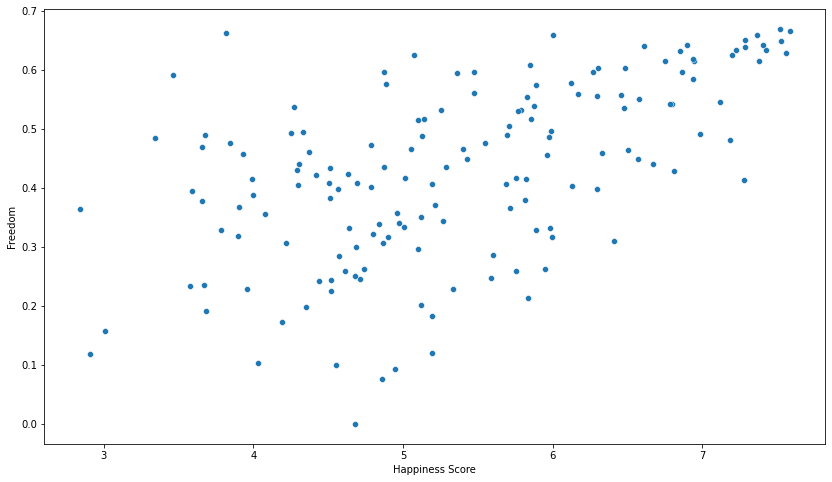

In [74]:
fig = plt.figure(figsize=(14,8))
sns.scatterplot(x= df['Happiness Score'],y=df['Freedom'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Trust (Government Corruption)'>

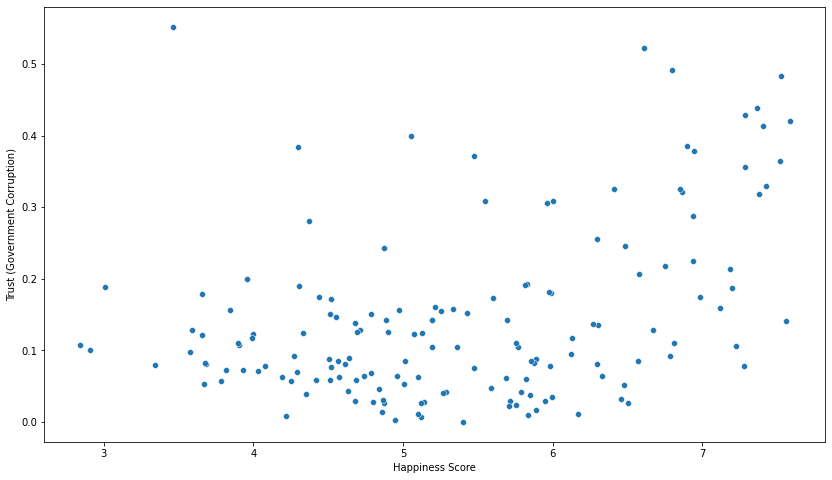

In [73]:
fig = plt.figure(figsize=(14,8))
sns.scatterplot(x= df['Happiness Score'],y=df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Generosity'>

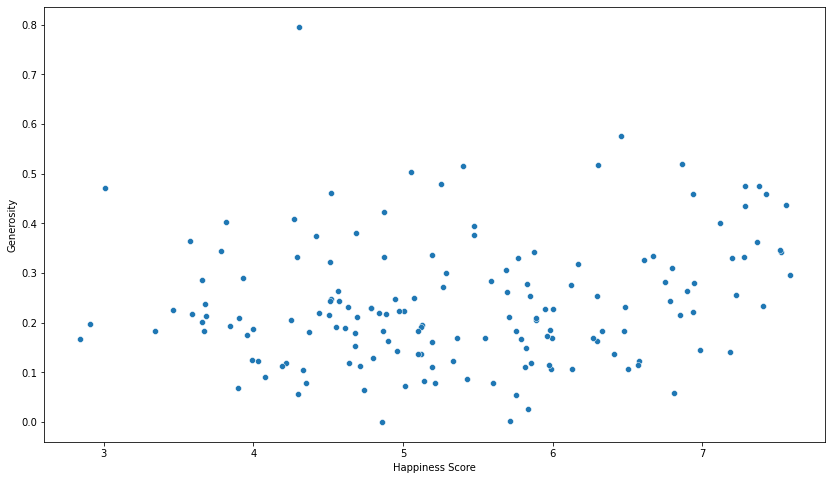

In [72]:
fig = plt.figure(figsize=(14,8))
sns.scatterplot(x= df['Happiness Score'],y=df['Generosity'])

### Conclusion

We can see that there is a general upward trend in happiness for countries as any of Economy(GDP per capita), health quality(Life Expectancy) or family(social support) quality increase.<br>Countries with great health care, great family relationships, great economy can expect the average citizen to report a high quality of life. It would therefore be wise that nations make it a priority to provide its citizens with the opportunities and support required to develop these crucial life pillars, and in return for their efforts, to reap the benefits on a national level.